### Marketing Mix Models

Marketing Mix Models (MMM) are analytical tools used to measure the impact of various marketing activities on sales. Through the analysis of historical data, companies can understand the effectiveness of different channels of the marketing mix. This approach allows companies to optimize their marketing strategies, and predict future performance.

The dataset used deals with an e-commerce and its distribution channels. In particular, the dataset distinguishes between the amount invested in off-line channels (TV, Radio, Newspapers) and on-line channels (Google keywords, facebook).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import google.colab
import zipfile

In [ ]:
google.colab.drive.mount('/content/drive')
PROJECT_DIR=('/content/drive/MyDrive/')
(PROJECT_DIR + "Marketing_Spend.csv", "r")

Mounted at /content/drive


('/content/drive/MyDrive/Marketing_Spend.csv', 'r')

In [ ]:
google.colab.drive.mount('/content/drive')
RAW_DATA_PATH = "/content/drive/MyDrive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv(RAW_DATA_PATH+'Marketing_Spend.csv')
df_raw.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
df_raw.Date.min()

'1/1/2019'

In [ ]:
df_raw.Date.max()

'9/9/2019'

In [ ]:
df_raw.describe(percentiles=[0.01,.05,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Offline_Spend,365.0,2843.561644,952.292448,500.00,500.0000,1000.000,1500.000,2500.0,3000.00,3500.00,4000.000,4500.000,5000.0000,5000.00
Online_Spend,365.0,1905.880740,808.856853,320.25,482.5132,683.508,879.512,1258.6,1881.94,2435.12,2919.254,3395.076,3941.3828,4556.93


## EDA

In [ ]:
df_clean = df_raw.copy()
df_clean['Date'] = pd.to_datetime(df_raw.Date)
df_clean['year'] = df_clean.Date.dt.year
df_clean['month'] = df_clean.Date.dt.month
df_clean['yearmonth'] = pd.to_datetime(dict(year=df_clean.year, month=df_clean.month, day='01'))

In [ ]:
df_monthly_agg = (
    df_clean
    .groupby('yearmonth')
    .agg(
         online_adv=('Online_Spend','sum')
        , offline_adv=('Offline_Spend','sum')

    )
    .reset_index()
    #.melt(id_vars=['yearmonth'], value_vars=['online_adv','offline_adv'],
        #var_name='kpi', value_name='kpi_value')
)

In [ ]:
df_monthly_agg.head()

,yearmonth,online_adv,offline_adv
0,2019-01-01,58328.95,96600
1,2019-02-01,55807.92,81300
2,2019-03-01,48750.09,73500
3,2019-04-01,61026.83,96000
4,2019-05-01,52759.64,65500


In [ ]:
df_monthly_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   yearmonth    12 non-null     datetime64[ns]
 1   online_adv   12 non-null     float64       
 2   offline_adv  12 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 416.0 bytes


In [ ]:
df_monthly_agg.describe(percentiles=[0.01,.05,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max,std
yearmonth,12,2019-06-16 12:00:00,2019-01-01 00:00:00,2019-01-04 09:50:24,2019-01-18 01:12:00,2019-02-03 19:12:00,2019-03-24 06:00:00,2019-06-16 00:00:00,2019-09-08 12:00:00,2019-10-28 21:36:00,2019-11-14 12:00:00,2019-11-27 16:48:00,2019-12-01 00:00:00,NaN
online_adv,12.0,57970.539167,48750.09,49164.1795,50820.5375,52534.871,52749.1925,56606.035,59003.42,67433.147,71971.6655,75713.3331,76648.75,7708.868525
offline_adv,12.0,86491.666667,65500.0,65720.0,66600.0,68100.0,78750.0,84250.0,94125.0,96540.0,108030.0,119206.0,122000.0,15347.635787


In [ ]:
df_monthly_agg = (
    df_clean
    .groupby('yearmonth')
    .agg(
         online_adv=('Online_Spend','sum')
        , offline_adv=('Offline_Spend','sum')

    )
    .reset_index()
    .melt(id_vars=['yearmonth'], value_vars=['online_adv','offline_adv'],
        var_name='kpi', value_name='kpi_value')
)

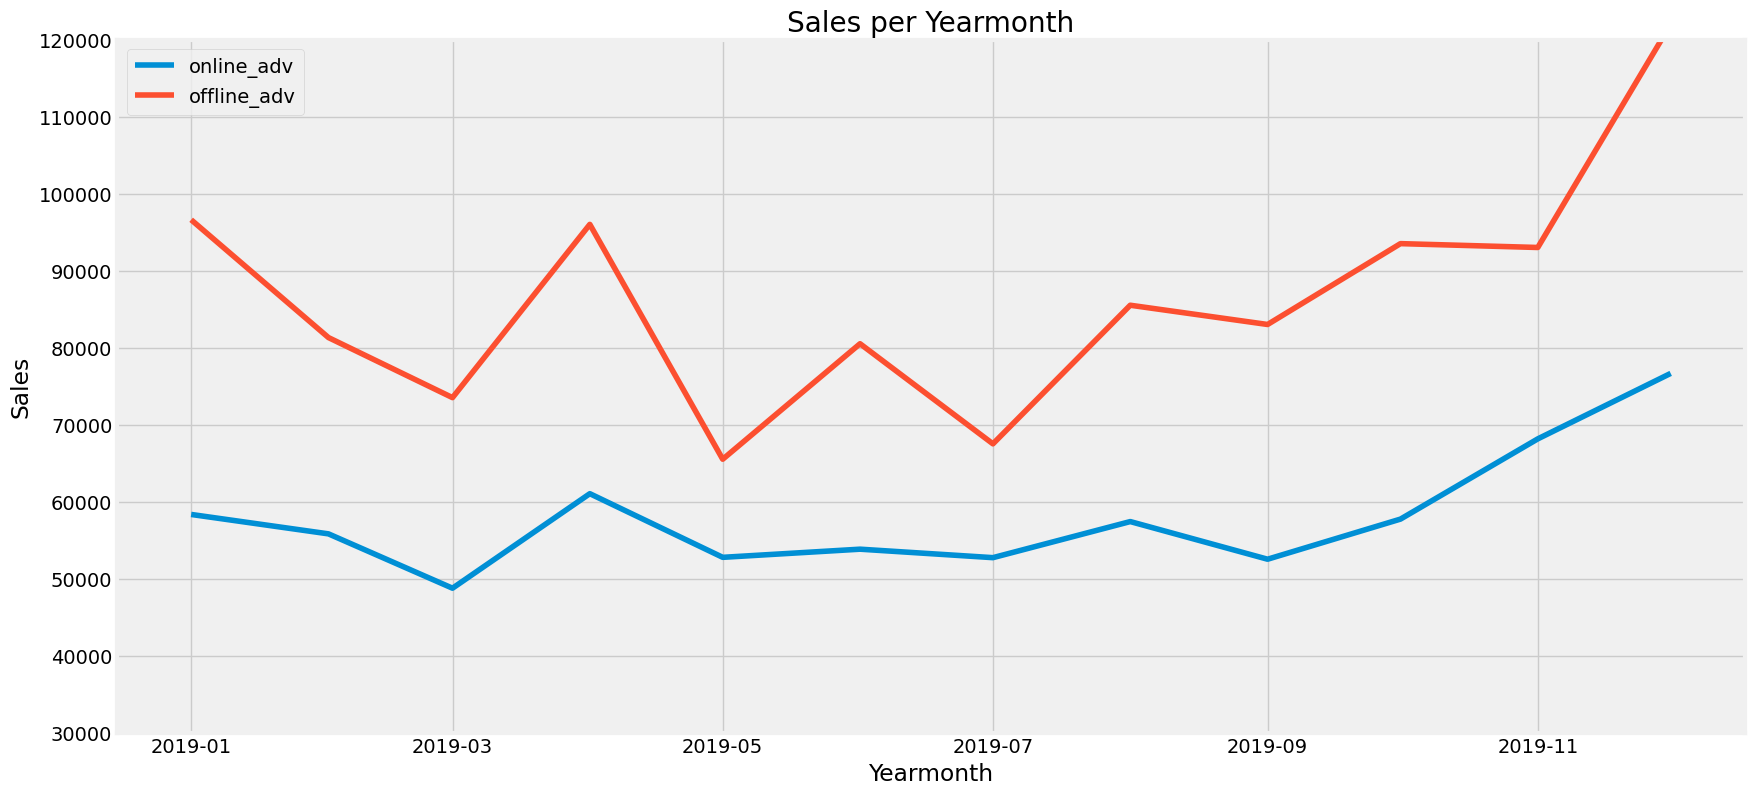

In [ ]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.lineplot(x='yearmonth', y='kpi_value', hue='kpi', data=df_monthly_agg)
plt.ylim((30000,120000))
plt.ylabel('Sales')
plt.xlabel('Yearmonth')
plt.legend()
plt.title('Sales per Yearmonth')
plt.show()

## Marketing Mix Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

class ExponentialSaturation(BaseEstimator, TransformerMixin):
    def __init__(self, a=1.):
        self.a = a

    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True) # from BaseEstimator
        return self
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False) # from BaseEstimator
        return 1 - np.exp(-self.a*X)

In [ ]:
from scipy.signal import convolve2d

class ExponentialCarryover(BaseEstimator, TransformerMixin):
    def __init__(self, strength=0.5, length=1):
        self.strength = strength
        self.length = length
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        return self
    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
        return convolution

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

adstock = ColumnTransformer(
    [
     ('online_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Online_Spend']),
     ('offline_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Offline_Spend'])
    ],
    remainder='passthrough'
)
model = Pipeline([
                  ('adstock', adstock),
                  ('regression', LinearRegression())
])

In [ ]:
model

Pipeline(steps=[('adstock',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('online_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Online_Spend']),
                                                 ('offline_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['Offline_Spend'])])),
                ('regression', LinearRegression())])

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_model = GridSearchCV(
    estimator=model,
    cv=TimeSeriesSplit(),
    param_grid={
    'adstock__online_pipe__carryover__strength': [0.52],
    'adstock__online_pipe__carryover__length': [4],
    'adstock__online_pipe__saturation__a': [0.0001],
    'adstock__offline_pipe__carryover__strength': [0.45],
    'adstock__offline_pipe__carryover__length': [0],
    'adstock__offline_pipe__saturation__a': [0.0001],
    }
)

In [ ]:
df_clean

,Date,Offline_Spend,Online_Spend,year,month,yearmonth
0,2019-01-01,4500,2424.50,2019,1,2019-01-01
1,2019-01-02,4500,3480.36,2019,1,2019-01-01
2,2019-01-03,4500,1576.38,2019,1,2019-01-01
3,2019-01-04,4500,2928.55,2019,1,2019-01-01
4,2019-01-05,4500,4055.30,2019,1,2019-01-01
...,...,...,...,...,...,...
360,2019-12-27,4000,3396.87,2019,12,2019-12-01
361,2019-12-28,4000,3246.84,2019,12,2019-12-01
362,2019-12-29,4000,2546.58,2019,12,2019-12-01
363,2019-12-30,4000,674.31,2019,12,2019-12-01


Sinceh there is not a column that considers the sales, I add a column named "Sales" which is the sum of offline spend, online spend and a random integer between 3000 and 6000 that represent the baseline.
The baseline represents the sales not directly attributed to the marketing channels.

In [ ]:
import random
df_clean['Sales'] = df_clean['Offline_Spend'] + df_clean['Online_Spend']+ random.randint(3000,6000)


In [ ]:
df_clean

,Date,Offline_Spend,Online_Spend,year,month,yearmonth,Sales
0,2019-01-01,4500,2424.50,2019,1,2019-01-01,12371.50
1,2019-01-02,4500,3480.36,2019,1,2019-01-01,13427.36
2,2019-01-03,4500,1576.38,2019,1,2019-01-01,11523.38
3,2019-01-04,4500,2928.55,2019,1,2019-01-01,12875.55
4,2019-01-05,4500,4055.30,2019,1,2019-01-01,14002.30
...,...,...,...,...,...,...,...
360,2019-12-27,4000,3396.87,2019,12,2019-12-01,12843.87
361,2019-12-28,4000,3246.84,2019,12,2019-12-01,12693.84
362,2019-12-29,4000,2546.58,2019,12,2019-12-01,11993.58
363,2019-12-30,4000,674.31,2019,12,2019-12-01,10121.31


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
 3   year           365 non-null    int32         
 4   month          365 non-null    int32         
 5   yearmonth      365 non-null    datetime64[ns]
 6   Sales          365 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1)
memory usage: 17.2 KB


In [ ]:
X = df_clean.drop(columns=['Sales','year','month','yearmonth','Date'])
y = df_clean['Sales']

In [ ]:
tuned_model.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('adstock',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('online_pipe',
                                                                         Pipeline(steps=[('carryover',
                                                                                          ExponentialCarryover()),
                                                                                         ('saturation',
                                                                                          ExponentialSaturation())]),
                                                                         ['Online_Spend']),
                                                                        ('offline_pipe',
                                                                         Pipeline(steps=[('carryover',...
                                                                         ['Offline_Spend'])])),
                                       ('regression', LinearRegression())]),
             param_grid={'adstock__offline_pipe__carryover__length': [0],
                         'adstock__offline_pipe__carryover__strength': [0.45],
                         'adstock__offline_pipe__saturation__a': [0.0001],
                         'adstock__online_pipe__carryover__length': [4],
                         'adstock__online_pipe__carryover__strength': [0.52],
                         'adstock__online_pipe__saturation__a': [0.0001]})

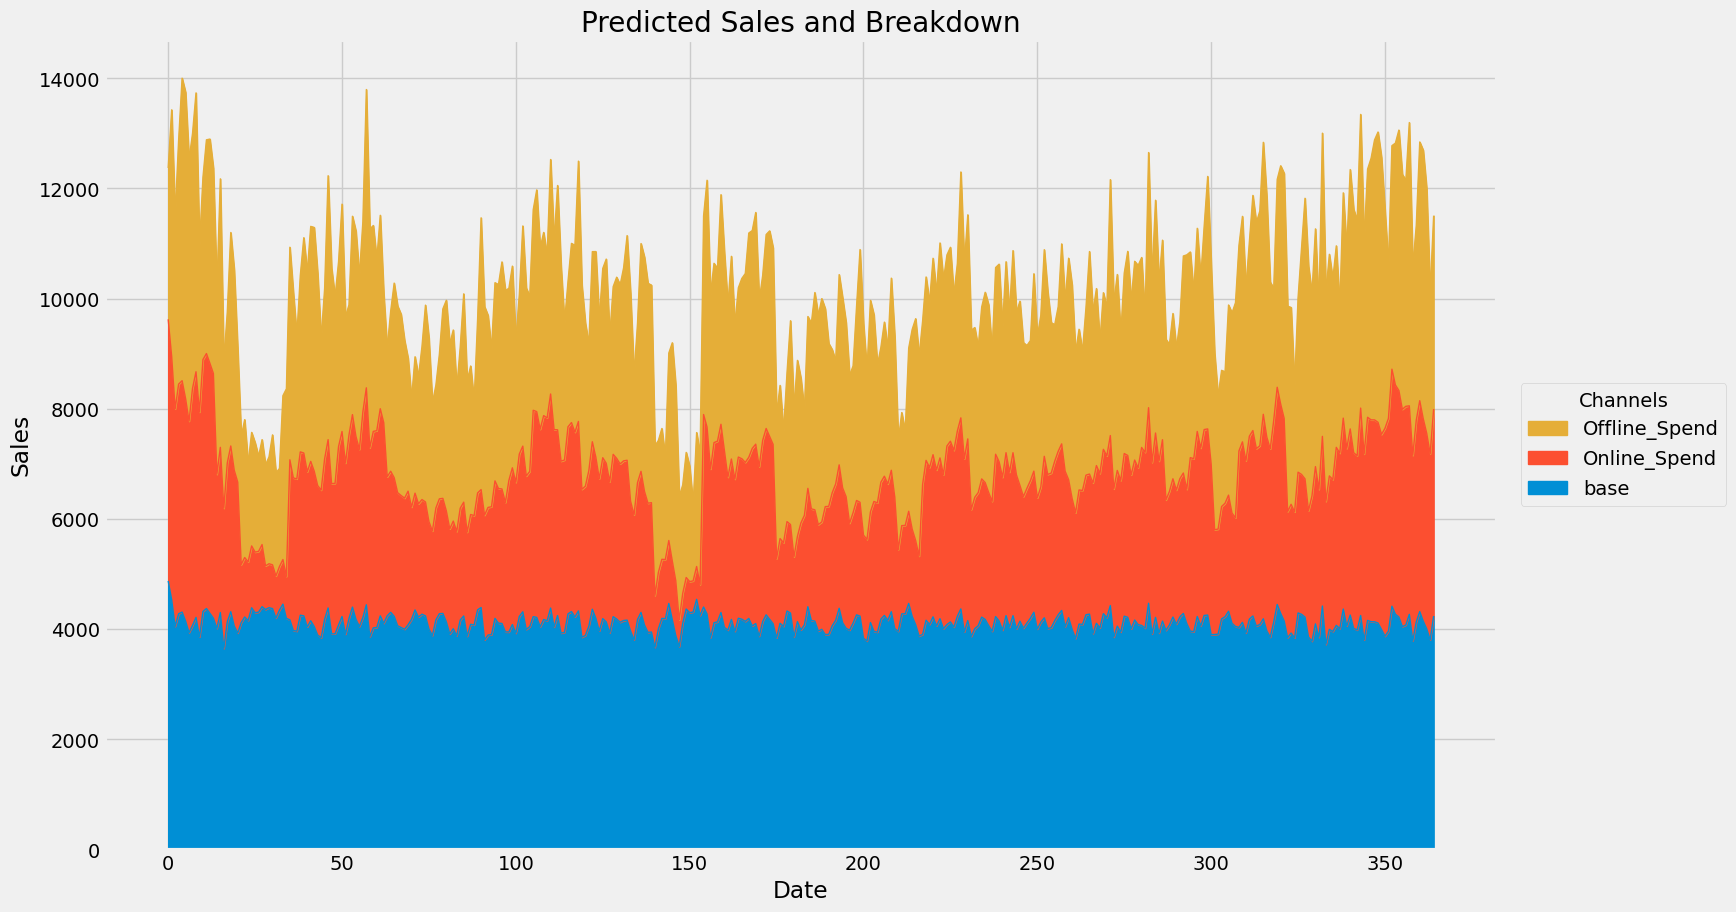

In [ ]:
adstock_data = pd.DataFrame(
    tuned_model.best_estimator_.named_steps['adstock'].transform(X),
    columns=X.columns,
    index=X.index
)
weights = pd.Series(
    tuned_model.best_estimator_.named_steps['regression'].coef_,
    index=X.columns
)
base = tuned_model.best_estimator_.named_steps['regression'].intercept_
unadj_contributions = adstock_data.mul(weights).assign(base=base)
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    )
ax = (adj_contributions[[ 'base','Online_Spend', 'Offline_Spend']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date'
      )
     )

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

In [ ]:
adstock_data

,Offline_Spend,Online_Spend
0,0.215297,0.362372
1,0.377561,0.362372
2,0.332473,0.362372
3,0.395302,0.362372
4,0.486807,0.362372
...,...,...
360,0.415496,0.329680
361,0.448744,0.329680
362,0.423103,0.329680
363,0.294726,0.329680


In [ ]:
weights

,0
Offline_Spend,10777.348143
Online_Spend,11072.230207


In [ ]:
base

4118.714299974703

In [ ]:
unadj_contributions

,Offline_Spend,Online_Spend,base
0,2320.330920,4012.264526,4118.7143
1,4069.108707,4012.264526,4118.7143
2,3583.175542,4012.264526,4118.7143
3,4260.307177,4012.264526,4118.7143
4,5246.490109,4012.264526,4118.7143
...,...,...,...
360,4477.948881,3650.292345,4118.7143
361,4836.274469,3650.292345,4118.7143
362,4559.930388,3650.292345,4118.7143
363,3176.360904,3650.292345,4118.7143


In [ ]:
adj_contributions

,Offline_Spend,Online_Spend,base
0,2746.638907,4749.426798,4875.434295
1,4478.442253,4415.879809,4533.037939
2,3524.820664,3946.921591,4051.637745
3,4426.804293,4169.067884,4279.677823
4,5491.541697,4199.668251,4311.090052
...,...,...,...
360,4696.203328,3828.206956,4319.459716
361,4870.251901,3675.937614,4147.650485
362,4435.896603,3551.001448,4006.681948
363,2937.218256,3375.468229,3808.623515


In [ ]:
y

,Sales
0,12371.50
1,13427.36
2,11523.38
3,12875.55
4,14002.30
...,...
360,12843.87
361,12693.84
362,11993.58
363,10121.31


## Further Analysis

**Channel efficiency analysis**

ROI, or Return on Investment, is a measure used to evaluate the efficiency of an investment. In this case I calculate the ROI for online and offline channels, showing that it is better to invest in offline channels.

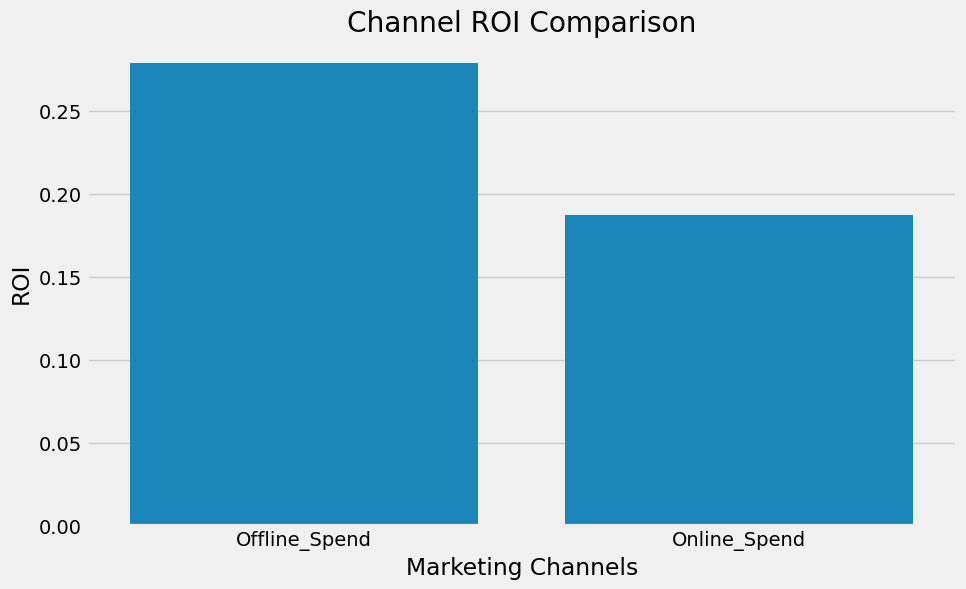

In [ ]:
# Selecting only numeric columns for calculating Total_Spend
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Sales')  # Exclude the 'Sales' column from summation

# Calculate Total_Spend considering only numeric columns
df_clean['Total_Spend'] = df_clean[numeric_columns].sum(axis=1)

# Calculate ROI for each channel
df_clean['ROI'] = df_clean['Sales'] / df_clean['Total_Spend']

# Plotting ROI for each channel
roi_columns = ['Offline_Spend', 'Online_Spend']
roi_values = df_clean[roi_columns].sum() / df_clean['Sales'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=roi_columns, y=roi_values)
plt.title('Channel ROI Comparison')
plt.ylabel('ROI')
plt.xlabel('Marketing Channels')
plt.show()


**Correlation Analysis**

I explore the correlations between online/offline and sales using a heatmap.

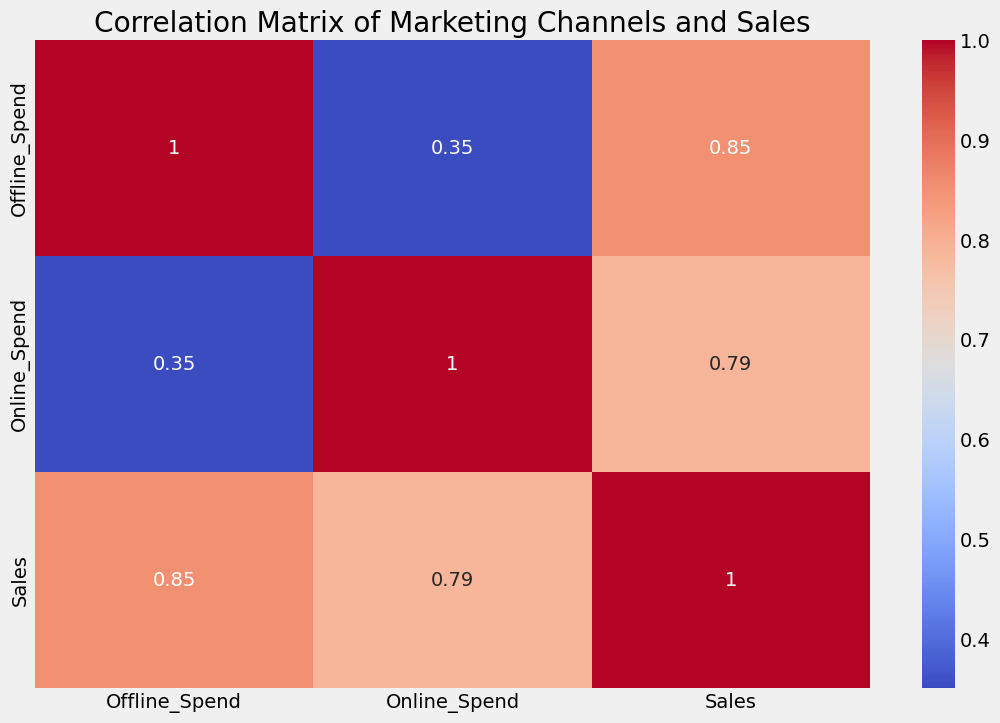

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Drop the specified columns
df_clean_dropped = df_clean.drop(columns=['Date', 'year', 'month', 'yearmonth', 'ROI', 'Total_Spend'])

# Compute the correlation matrix for the remaining data
corr_matrix = df_clean_dropped.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Marketing Channels and Sales')
plt.show()
